# Practice 04 Foundation of Machine Learning

Dataset is a historical flight data in Malaysia from Oct 2018 – Nov 2018
Data consist of information of flight such as:
1. Date of flight
2. Date of arrival
3. Departure Delay
4. Tail Number
5. Airline Name
6. Departure Location
7. Arrival Location
8. Flight Number
9. Delay


**There are 3 models that you have to make:**
1. Linear Regression
2. Logistic Regression
3. Choose 1 Supervised model

**Task**
1. Provide travel recommendation to passenger (best time to take a flight or best airline), so they will not get caught in delay. Each recommendation has to be supported by at least 1 graph
2. Create a model to estimate the delay duration ( Linear Regression )
3. Create a model to predict delay > 60 min ( Logistic regression and another supervised model you choosing )
4. Did you do some feature engineering on the dataset ? if yes, please give the reason for each feature you created
5. Using those models predict delay that will happened in December for delay >60

# Import Libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline

## Import dataset

In [2]:
df_train = pd.read_csv('training_dataset.csv')
df_train.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111068 entries, 0 to 111067
Data columns (total 26 columns):
id                            111068 non-null int64
number                        111068 non-null object
airline                       111068 non-null object
airline_name                  111068 non-null object
scheduled_departure_time      111068 non-null object
scheduled_arrival_time        111063 non-null object
departure_airport_city        111068 non-null object
departure_airport_code        111068 non-null object
departure_airport_country     111068 non-null object
departure_airport_gate        66859 non-null object
departure_airport_name        111068 non-null object
departure_airport_region      111068 non-null object
departure_airport_terminal    69728 non-null object
departure_airport_timezone    111068 non-null object
arrival_airport_city          111068 non-null object
arrival_airport_code          111068 non-null object
arrival_airport_country       111068 non-nul

In [4]:
df_train['scheduled_departure_time'] = pd.to_datetime(df_train['scheduled_departure_time'])
df_train['scheduled_arrival_time'] = pd.to_datetime(df_train['scheduled_arrival_time'])

## EDA

In [5]:
df_train[['delay']].describe(include = [np.number])

,delay
count,111068.000000
mean,11.540210
std,26.806913
min,0.000000
25%,0.000000
50%,1.000000
75%,13.000000
max,978.000000


75% of flights delays range from 0 to 13 minutes 

In [6]:
df_train.describe(exclude = [np.number])

,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,departure_airport_name,...,arrival_airport_code,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration
count,111068,111068,111068,111068,111063,111068,111068,111068,66859,111068,...,111068,111068,12087,111068,111068,53050,111068,111049,111049,111068
unique,2515,104,104,12912,14210,15,16,1,189,16,...,154,39,267,154,4,17,43,49,49,693
top,MH5312,AK,AirAsia,2018-11-07 23:00:00,2018-10-20 09:30:00,Kuala Lumpur,KUL,MY,H2,Kuala Lumpur International Airport,...,KUL,MY,02,Kuala Lumpur International Airport,Asia,2,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,1h
freq,114,25437,25437,80,44,69552,62530,111068,1358,62530,...,16243,60343,802,16243,105958,18403,60343,45019,45019,9784
first,NaN,NaN,NaN,2018-10-04 22:00:00,2018-10-04 22:45:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-11-30 23:55:00,2018-12-01 06:40:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
def outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    q1_ext = q1 - 1.5 * iqr
    q3_ext = q3 + 1.5 * iqr
    
    return q1_ext, q3_ext

In [96]:
outliers(df_train, 'delay')

(-19.5, 32.5)

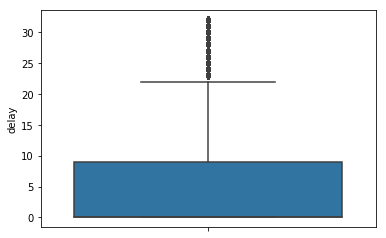

In [97]:
sns.boxplot(y='delay', data=df_train[df_train['delay'] <= 32.5])

In [98]:
pd.get_dummies(df_train['scheduled_departure_day'])

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0
6,1,0,0,0,0,0,0
7,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0
9,1,0,0,0,0,0,0


### Top 10 most airlines flights

In [7]:
airline_count = df_train.groupby(['airline_name'])[['id']].count().sort_values(by = ['id'], ascending = False).reset_index()
airline_count.head()

,airline_name,id
0,AirAsia,25437
1,Malaysia Airlines,23198
2,Malindo Air,8374
3,Qatar Airways,5993
4,Emirates,5961


Text(0,0.5,'Airline')

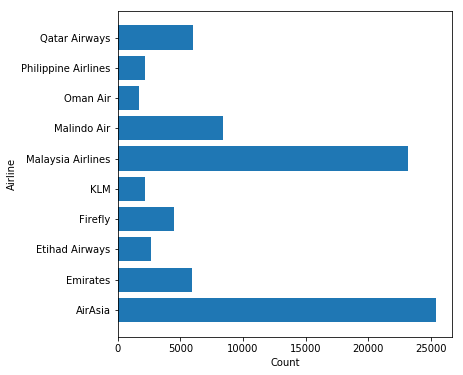

In [8]:
plt.figure(figsize=(6, 6))
plt.barh(airline_count['airline_name'].head(10), airline_count['id'].head(10))
plt.xlabel('Count')
plt.ylabel('Airline')

### Top 10 Departures City Airport

In [9]:
departure_count = df_train.groupby(['departure_airport_city'])[['id']].count().sort_values(by = ['id'], ascending = False).reset_index()
departure_count.head()

,departure_airport_city,id
0,Kuala Lumpur,69552
1,Penang,11291
2,Kota Kinabalu,8439
3,Kuching,5991
4,Johor Bharu,4251


Text(0,0.5,'Departure Airport City')

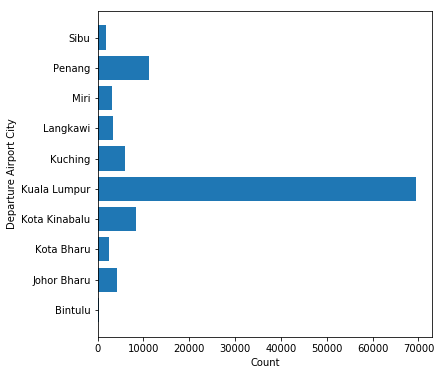

In [10]:
plt.figure(figsize=(6, 6))
plt.barh(departure_count['departure_airport_city'].head(10), departure_count['id'].sort_values(ascending = False).head(10))
plt.xlabel('Count')
plt.ylabel('Departure Airport City')

### Top 10 Arrival Airport City

In [11]:
arrival_count = df_train.groupby(['arrival_airport_city'])[['id']].count().sort_values(by = ['id'], ascending = False).reset_index()
arrival_count.head()          

,arrival_airport_city,id
0,Kuala Lumpur,20535
1,Singapore,12553
2,Penang,6374
3,Kuching,5043
4,Kota Kinabalu,4675


Text(0,0.5,'Arrival Airport City')

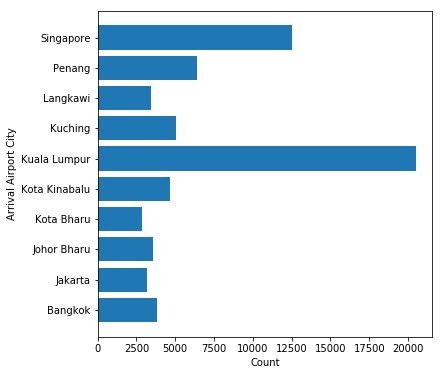

In [12]:
plt.figure(figsize=(6, 6))
plt.barh(arrival_count['arrival_airport_city'].head(10), arrival_count['id'].sort_values(ascending = False).head(10))
plt.xlabel('Count')
plt.ylabel('Arrival Airport City')

### Top 10 most airlines with highest mean delays in minute 

In [13]:
mean_delay = df_train.groupby(['airline_name'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).reset_index()
mean_delay.head()

,airline_name,delay
0,Cargolux,190.200000
1,Nepal Airlines,96.535714
2,Pakistan International Airlines,58.625000
3,Biman Bangladesh Airlines,46.114286
4,VietJet Air,40.385965


Text(0,0.5,'Airline')

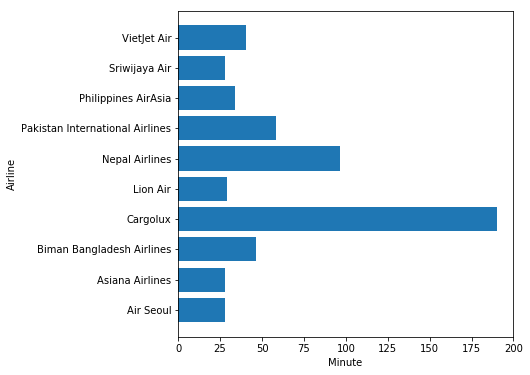

In [14]:
plt.figure(figsize=(6, 6))
plt.barh(mean_delay['airline_name'].head(10), mean_delay['delay'].sort_values(ascending = False).head(10))
plt.xlabel('Minute')
plt.ylabel('Airline')

### Top 10 most airlines with lowest mean delays in minute 

Text(0,0.5,'Airline')

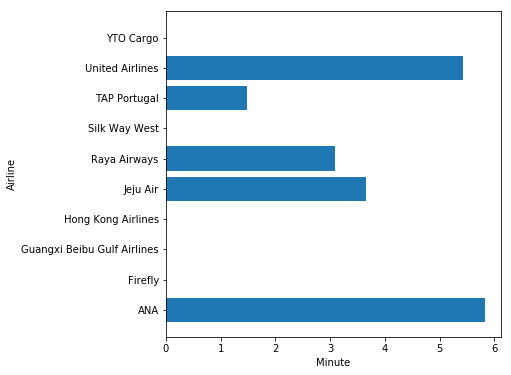

In [24]:
plt.figure(figsize=(6, 6))
plt.barh(mean_delay['airline_name'].tail(10), mean_delay['delay'].tail(10))
plt.xlabel('Minute')
plt.ylabel('Airline')

### Top 10 most airlines with lowest mean delays in minute from Depart Kuala Lumpur City

Text(0.5,0,'Minute')

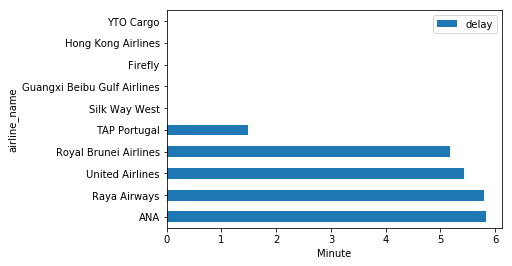

In [16]:
df_train[df_train['departure_airport_city'] == 'Kuala Lumpur'].groupby(['airline_name'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).reset_index().tail(10).plot.barh('airline_name', 'delay')
plt.xlabel('Minute')

### Top 10 most airlines with lowest mean delays in minute Arrival in Kuala Lumpur City

There were some airflights that had 0 delays, but most had specific destination such as YTO Cargo only to China, if the subject only depart from Kuala Lumpur YTO Cargo, Hongkong Airlines, Firefly, Guangxi, and Silkway

Text(0.5,0,'Minute')

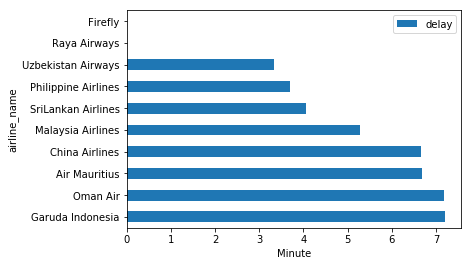

In [17]:
df_train[df_train['arrival_airport_city'] == 'Kuala Lumpur'].groupby(['airline_name'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).reset_index().tail(10).plot.barh('airline_name', 'delay')
plt.xlabel('Minute')

### Top 10 times with lowest mean delays in minute Departure from Kuala Lumpur City

In [18]:
departure_delay = df_train.groupby(['scheduled_departure_time'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).reset_index()
departure_delay.head(10)

,scheduled_departure_time,delay
0,2018-11-17 14:45:00,660.0
1,2018-10-10 11:15:00,366.5
2,2018-10-17 11:15:00,364.0
3,2018-11-26 18:30:00,317.0
4,2018-11-21 18:30:00,292.0
5,2018-11-30 18:30:00,289.0
6,2018-11-23 16:50:00,240.0
7,2018-11-24 16:05:00,231.0
8,2018-11-03 14:45:00,227.0
9,2018-11-16 16:50:00,211.0


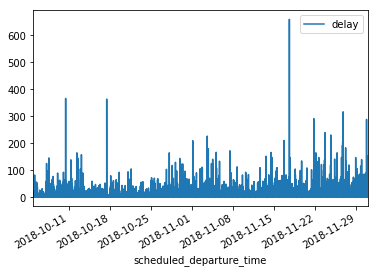

In [19]:
departure_delay.plot('scheduled_departure_time', 'delay')
plt.figure(figsize = (20, 20))

### Top 10 times with lowest mean delays in minute Arrival in Kuala Lumpur City

In [20]:
arrival_delay = df_train.groupby(['scheduled_arrival_time'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).reset_index()
arrival_delay.tail(10)

,scheduled_arrival_time,delay
14200,2018-10-12 03:10:00,0.0
14201,2018-11-11 13:15:00,0.0
14202,2018-10-12 02:30:00,0.0
14203,2018-11-11 15:15:00,0.0
14204,2018-10-12 02:05:00,0.0
14205,2018-10-12 01:55:00,0.0
14206,2018-10-12 01:15:00,0.0
14207,2018-10-12 00:25:00,0.0
14208,2018-11-11 18:30:00,0.0
14209,2018-10-04 22:45:00,0.0


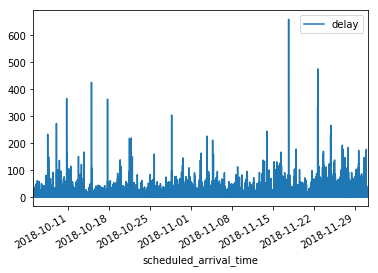

In [21]:
arrival_delay.plot('scheduled_arrival_time', 'delay')
plt.figure(figsize = (20, 20))

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text xticklabel objects>)

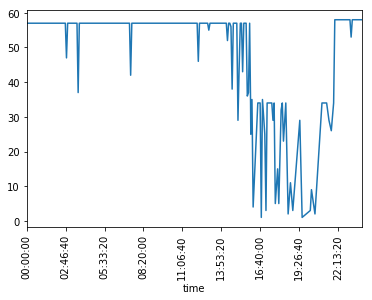

In [31]:
departure_delay['scheduled_departure_time'].dt.time.value_counts().plot()
plt.xticks(rotation = 90)

With assumption delays from departure based on graph seems that time above 22.13 until almost 14.00 had higher average of delay. Although this need further check by day and holiday

In [33]:
df_train["scheduled_departure_day"] = df_train["scheduled_departure_time"].apply(lambda x: x.strftime("%A"))

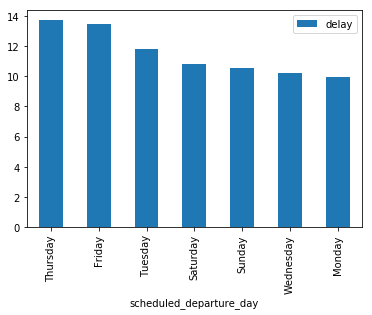

In [43]:
df_train.groupby(['scheduled_departure_day'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).reset_index().plot.bar('scheduled_departure_day', 'delay')

In [45]:
#Extract Minute

df_train["scheduled_departure_time_hour"] = df_train["scheduled_departure_time"].dt.time

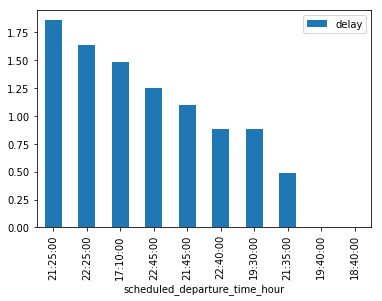

In [47]:
df_train.groupby(['scheduled_departure_time_hour'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).tail(10).reset_index().plot.bar('scheduled_departure_time_hour', 'delay')

In [55]:
df_train.groupby(['scheduled_departure_time_hour', 'scheduled_departure_day'])[['delay']].mean().sort_values(by = ['delay'], ascending = False).tail(10).reset_index()

,scheduled_departure_time_hour,scheduled_departure_day,delay
0,18:50:00,Thursday,0.0
1,21:25:00,Saturday,0.0
2,18:50:00,Friday,0.0
3,18:40:00,Thursday,0.0
4,18:40:00,Saturday,0.0
5,21:05:00,Thursday,0.0
6,21:05:00,Tuesday,0.0
7,18:20:00,Tuesday,0.0
8,21:10:00,Thursday,0.0
9,20:20:00,Wednesday,0.0


Seems weekdays and night are best time to depart

## Feature Engineering

### Flag Delay

In [73]:
#Flag delay above 60 minutes equal to 1

df_train.loc[df_train['delay'] > 60, 'flag_delay'] = 1
df_train.loc[df_train['delay'] <= 60, 'flag_delay'] = 0

In [76]:
df_train['flag_delay'].value_counts(normalize = True)*100

0    96.41841
1     3.58159
Name: flag_delay, dtype: float64

In [99]:
df_train.loc[df_train['scheduled_departure_day'] =='Sunday' , 'flag_weekend'] = 1
df_train.loc[df_train['scheduled_departure_day'] !='Sunday', 'flag_weekend'] = 0

In [82]:
df_train['flag_weekend'].value_counts()

0.0    95276
1.0    15792
Name: flag_weekend, dtype: int64

In [84]:
df_train.loc[df_train['departure_airport_city'] == 'Kuala Lumpur', 'flag_kl'] = 1
df_train.loc[df_train['departure_airport_city'] != 'Kuala Lumpur', 'flag_kl'] = 0

## Linear Regression